<a href="https://colab.research.google.com/github/Nithies08/fifa_WC-matches/blob/main/FIFA_WORLDCUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
from wordcloud import WordCloud

In [ ]:
import plotly.express as px

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np

In [9]:
fifa_df = pd.read_csv("/content/data.csv",encoding='latin1')


In [10]:
fifa_df.head(2)

,match,dayofweek,match_time,home_team,away_team,home_xg,away_xg,score,attendance,venue,...,home_clearances,away_clearances,home_offsides,away_offsides,home_gks,away_gks,home_throw_ins,away_throw_ins,home_long_balls,away_long_balls
0,1,Sun,2022-11-20 19:00:00,Qatar,Ecuador,0.3,1.2,0â2,67372,Al Bayt Stadium,...,18,7,3,4,4,7,20,17,51,70
1,2,Mon,2022-11-21 16:00:00,England,IR Iran,2.1,1.4,6â2,45334,Khalifa International Stadium,...,4,23,2,2,5,5,18,17,87,50


In [11]:
fifa_df.isnull().sum()

match                    0
dayofweek                0
match_time               0
home_team                0
away_team                0
home_xg                  0
away_xg                  0
score                    0
attendance               0
venue                    0
referee                  0
home_formation           0
away_formation           0
home_captain             0
away_captain             0
home_manager             0
away_manager             0
home_possession          0
away_possession          0
home_completed_passes    0
home_attempted_pases     0
away_completed_passes    0
away_attempted_pases     0
home_sot                 0
away_sot                 0
home_total_shots         0
away_total_shots         0
home_saves               0
away_saves               0
home_fouls               0
away_fouls               0
home_corners             0
away_corners             0
home_crosses             0
away_crosses             0
home_touches             0
away_touches             0
h

In [14]:
from sklearn.impute import KNNImputer
# Introduce missing values into the 'home_saves' column (for demonstration purposes)
missing_indices = np.random.choice(fifa_df.index, size=int(0.1 * len(fifa_df)), replace=False)  # Randomly select 10% of rows
fifa_df.loc[missing_indices, 'home_saves'] = np.nan

# Handle missing data using KNN imputation
imputer = KNNImputer(n_neighbors=5)  # Choose the number of neighbors
data_imputed = imputer.fit_transform(fifa_df[['home_saves']])

# Replace the 'home_saves' column with imputed values
fifa_df['home_saves'] = data_imputed

# Verify the imputation results (optional)
# Check if any missing values remain in the 'Price' column after imputation
missing_values_after_imputation = fifa_df['home_saves'].isnull().sum()
print("Missing values in 'home_saves' column after imputation:", missing_values_after_imputation)

Missing values in 'home_saves' column after imputation: 0


In [15]:
fifa_df = pd.read_csv("/content/data.csv",encoding='latin1')
group_stat_df=pd.read_csv("/content/group_stats.csv",encoding='latin1')

In [16]:
fifa_df['venue'].value_counts()


venue
Lusail Iconic Stadium            10
Al Bayt Stadium                   9
Khalifa International Stadium     8
Al Thumama Stadium                8
Education City Stadium            8
Ahmed bin Ali Stadium             7
Stadium 974                       7
Al Janoub Stadium                 7
Name: count, dtype: int64

In [17]:
x = fifa_df['venue'].value_counts().index
y = fifa_df['venue'].value_counts().values

df = pd.DataFrame({'Venue':x,
                  'Matches':fifa_df['venue'].value_counts().values })

fig = px.bar(df,
             x='Venue',
             y='Matches',
             color='Venue',
             title='Venue v/s No of Matches Played at Venue'
            )
fig.show()

In [21]:
variance=fifa_df[["home_xg","away_xg"]].var()
print(variance)

home_xg    0.791486
away_xg    0.909422
dtype: float64


In [22]:
correlation_matrix=fifa_df[['home_xg','away_xg']].corr()
print("correlation matrix:")
print(correlation_matrix)

correlation matrix:
          home_xg   away_xg
home_xg  1.000000 -0.240948
away_xg -0.240948  1.000000


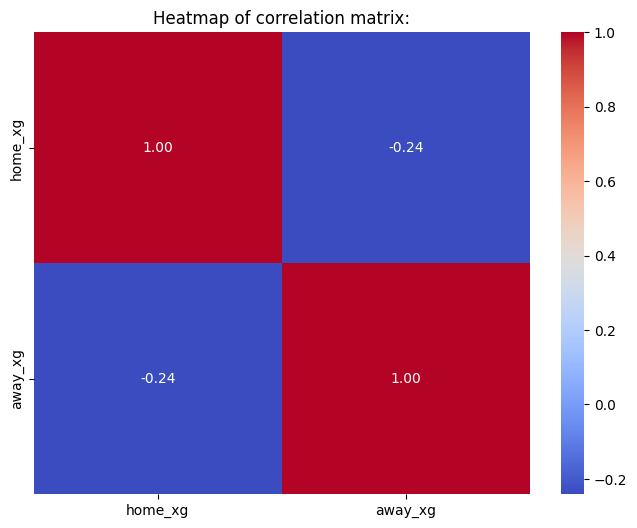

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of correlation matrix:')
plt.show()

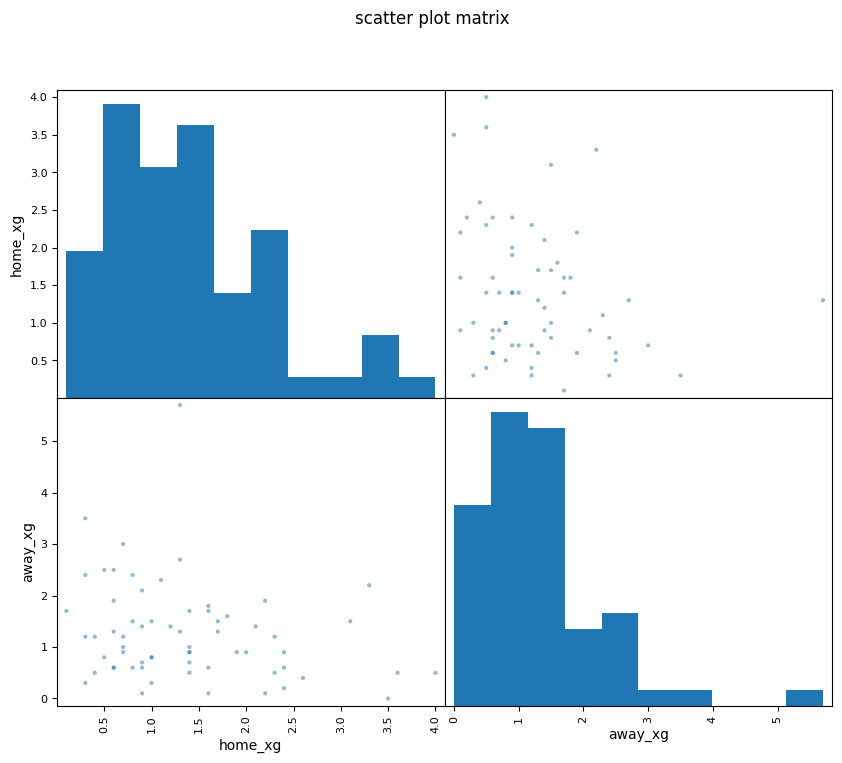

In [24]:
pd.plotting.scatter_matrix(fifa_df[['home_xg','away_xg']],figsize=(10,8))
plt.suptitle('scatter plot matrix')
plt.show()

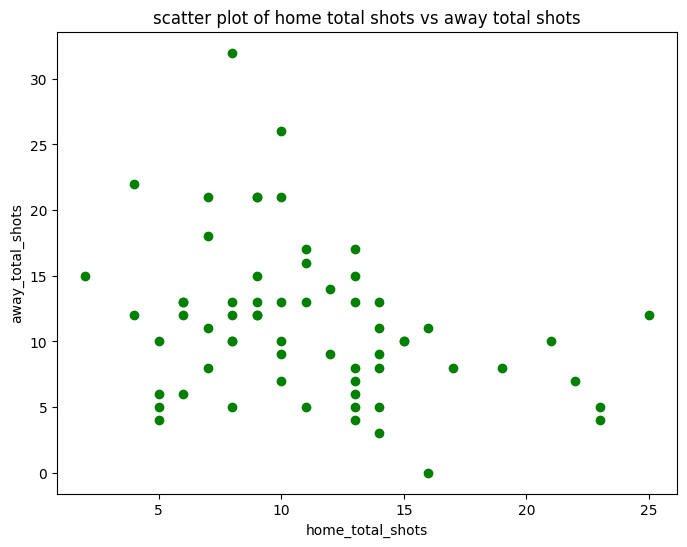

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(fifa_df['home_total_shots'],fifa_df['away_total_shots'],color='green')
plt.title('scatter plot of home total shots vs away total shots')
plt.xlabel('home_total_shots')
plt.ylabel('away_total_shots')
plt.show()

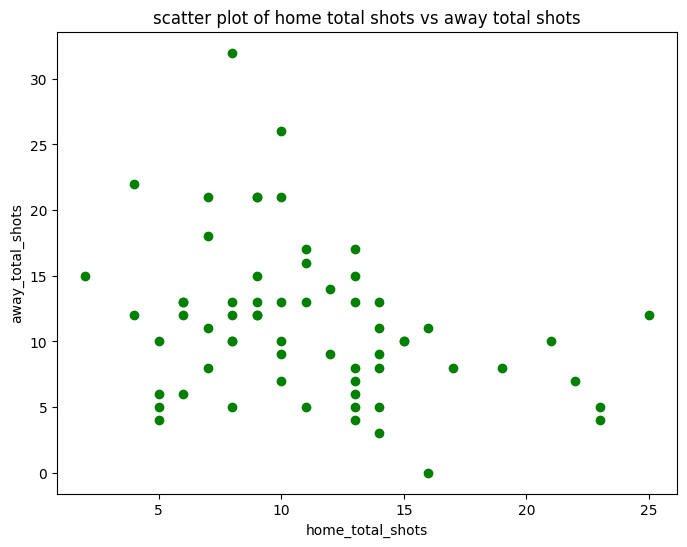

In [27]:
# prompt: scatter plot for home total shots vs away total shots

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(fifa_df['home_total_shots'],fifa_df['away_total_shots'],color='green')
plt.title('scatter plot of home total shots vs away total shots')
plt.xlabel('home_total_shots')
plt.ylabel('away_total_shots')
plt.show()


In [28]:
# prompt: k means clustering for the above

from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3)

kmeans.fit( fifa_df[['home_xg', 'away_xg']])




# Add the cluster assignments to the DataFrame
fifa_df['cluster'] = kmeans.labels_
print(fifa_df)
# Print the cluster assignments



    match dayofweek           match_time      home_team     away_team  \
0       1       Sun  2022-11-20 19:00:00          Qatar       Ecuador   
1       2       Mon  2022-11-21 16:00:00        England       IR Iran   
2       3       Mon  2022-11-21 19:00:00        Senegal   Netherlands   
3       4       Mon  2022-11-21 22:00:00  United States         Wales   
4       5       Tue  2022-11-22 13:00:00      Argentina  Saudi Arabia   
..    ...       ...                  ...            ...           ...   
59     60       Sat  2022-12-10 22:00:00        England        France   
60     61       Tue  2022-12-13 22:00:00      Argentina       Croatia   
61     62       Wed  2022-12-14 22:00:00         France       Morocco   
62     63       Sat  2022-12-17 18:00:00        Croatia       Morocco   
63     64       Sun  2022-12-18 18:00:00      Argentina        France   

    home_xg  away_xg          score  attendance  \
0       0.3      1.2          0â2       67372   
1       2.1      1.4 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [31]:
# Check if 'X' is defined
if 'X' not in globals():
    # Initialize 'X' with appropriate data
    X = fifa_df[['home_xg', 'away_xg']]

# Calculate the z-score for each data point
z_scores = np.abs((X - X.mean()) / X.std())

# Identify outliers as data points with z-scores greater than 3
outliers = np.where(z_scores > 3)

# Print the indices of the outliers
print(outliers)
print(fifa_df)

(array([43]), array([1]))
    match dayofweek           match_time      home_team     away_team  \
0       1       Sun  2022-11-20 19:00:00          Qatar       Ecuador   
1       2       Mon  2022-11-21 16:00:00        England       IR Iran   
2       3       Mon  2022-11-21 19:00:00        Senegal   Netherlands   
3       4       Mon  2022-11-21 22:00:00  United States         Wales   
4       5       Tue  2022-11-22 13:00:00      Argentina  Saudi Arabia   
..    ...       ...                  ...            ...           ...   
59     60       Sat  2022-12-10 22:00:00        England        France   
60     61       Tue  2022-12-13 22:00:00      Argentina       Croatia   
61     62       Wed  2022-12-14 22:00:00         France       Morocco   
62     63       Sat  2022-12-17 18:00:00        Croatia       Morocco   
63     64       Sun  2022-12-18 18:00:00      Argentina        France   

    home_xg  away_xg          score  attendance  \
0       0.3      1.2          0â2       6737

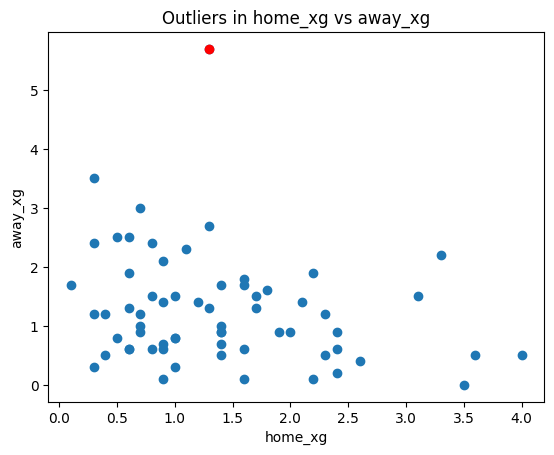

In [32]:
# prompt: plot the outliers

import matplotlib.pyplot as plt
# Plot the data points
plt.scatter(fifa_df['home_xg'], fifa_df['away_xg'])

# Highlight the outliers
plt.scatter(fifa_df.loc[outliers[0], 'home_xg'], fifa_df.loc[outliers[0], 'away_xg'], color='red')

# Label the axes and title
plt.xlabel('home_xg')
plt.ylabel('away_xg')
plt.title('Outliers in home_xg vs away_xg')

# Show the plot
plt.show()


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import scipy
from sklearn.metrics import silhouette_score


In [34]:
pip install pandas scikit-learn matplotlib


In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Data Cleaning
fifa_df.dropna(inplace=True)
fifa_df= fifa_df[fifa_df['home_xg'] > 0]

# Drop irrelevant columns (CustomerID, InvoiceDate) for correlation analysis
data_correlation = fifa_df.drop(columns=[ 'venue'])
# Drop non-numeric columns (like product codes)
data_numeric = data_correlation.select_dtypes(include=np.number)
# Calculate correlation matrix
correlation_matrix = data_numeric.corr()

# Get absolute correlation values with the target variable ('TotalPrice')
correlation_with_target = abs(correlation_matrix['home_xg']).sort_values(ascending=False)

# Select top correlated features (excluding 'TotalPrice' itself)
selected_features = correlation_with_target[1:].index.tolist()  # Exclude 'TotalPrice'

# Further Feature Selection based on selected features
X = fifa_df[selected_features]
y = fifa_df['home_xg']

# Perform feature selection using SelectKBest and f_regression
selector = SelectKBest(score_func=f_regression, k=min(2, len(selected_features)))
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get selected feature names
selected_feature_names = X.columns[selected_indices]

print("Selected Features:", selected_feature_names)

Selected Features: Index(['home_sot', 'home_total_shots'], dtype='object')
